In [27]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pickle
%matplotlib inline

In [2]:
dataset = pd.read_csv('..\\..\\Normalizado\\Indicadores\\WHO_ReferenceV2.csv', sep=";")

In [3]:
dataset

,Deaths7,Cases7,Deaths7Trend,Cases7Trend,deaths7perc,cases7perc,Country,Label
0,328,3857,1,1,0.000702,0.008249,ES,98.0
1,443,5379,1,1,0.000947,0.011504,ES,97.0
2,603,7379,1,1,0.001290,0.015782,ES,96.0
3,763,8167,1,1,0.001632,0.017467,ES,95.0
4,962,9556,1,1,0.002057,0.020438,ES,94.0
5,1214,11572,1,1,0.002596,0.024750,ES,93.0
6,1554,14178,1,1,0.003324,0.030323,ES,92.0
7,1944,15745,1,1,0.004158,0.033675,ES,91.0
8,2350,19169,1,1,0.005026,0.040998,ES,90.0
9,2833,20815,1,1,0.006059,0.044518,ES,89.0


In [4]:
dataset.describe()

,Deaths7,Cases7,Deaths7Trend,Cases7Trend,deaths7perc,cases7perc,Label
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,2095.298701,14320.314935,0.279221,0.301948,0.003695,0.025961,51.003247
std,1897.666752,13251.381333,0.449346,0.459850,0.003419,0.026202,29.984741
min,52.000000,1333.000000,0.000000,0.000000,0.000111,0.002205,0.000000
25%,445.500000,3545.750000,0.000000,0.000000,0.000804,0.006442,25.000000
50%,1431.000000,8542.000000,0.000000,0.000000,0.002411,0.014895,51.000000
75%,3462.000000,23695.750000,1.000000,1.000000,0.006042,0.039206,76.250000
max,7702.000000,54744.000000,1.000000,1.000000,0.012721,0.117083,110.000000


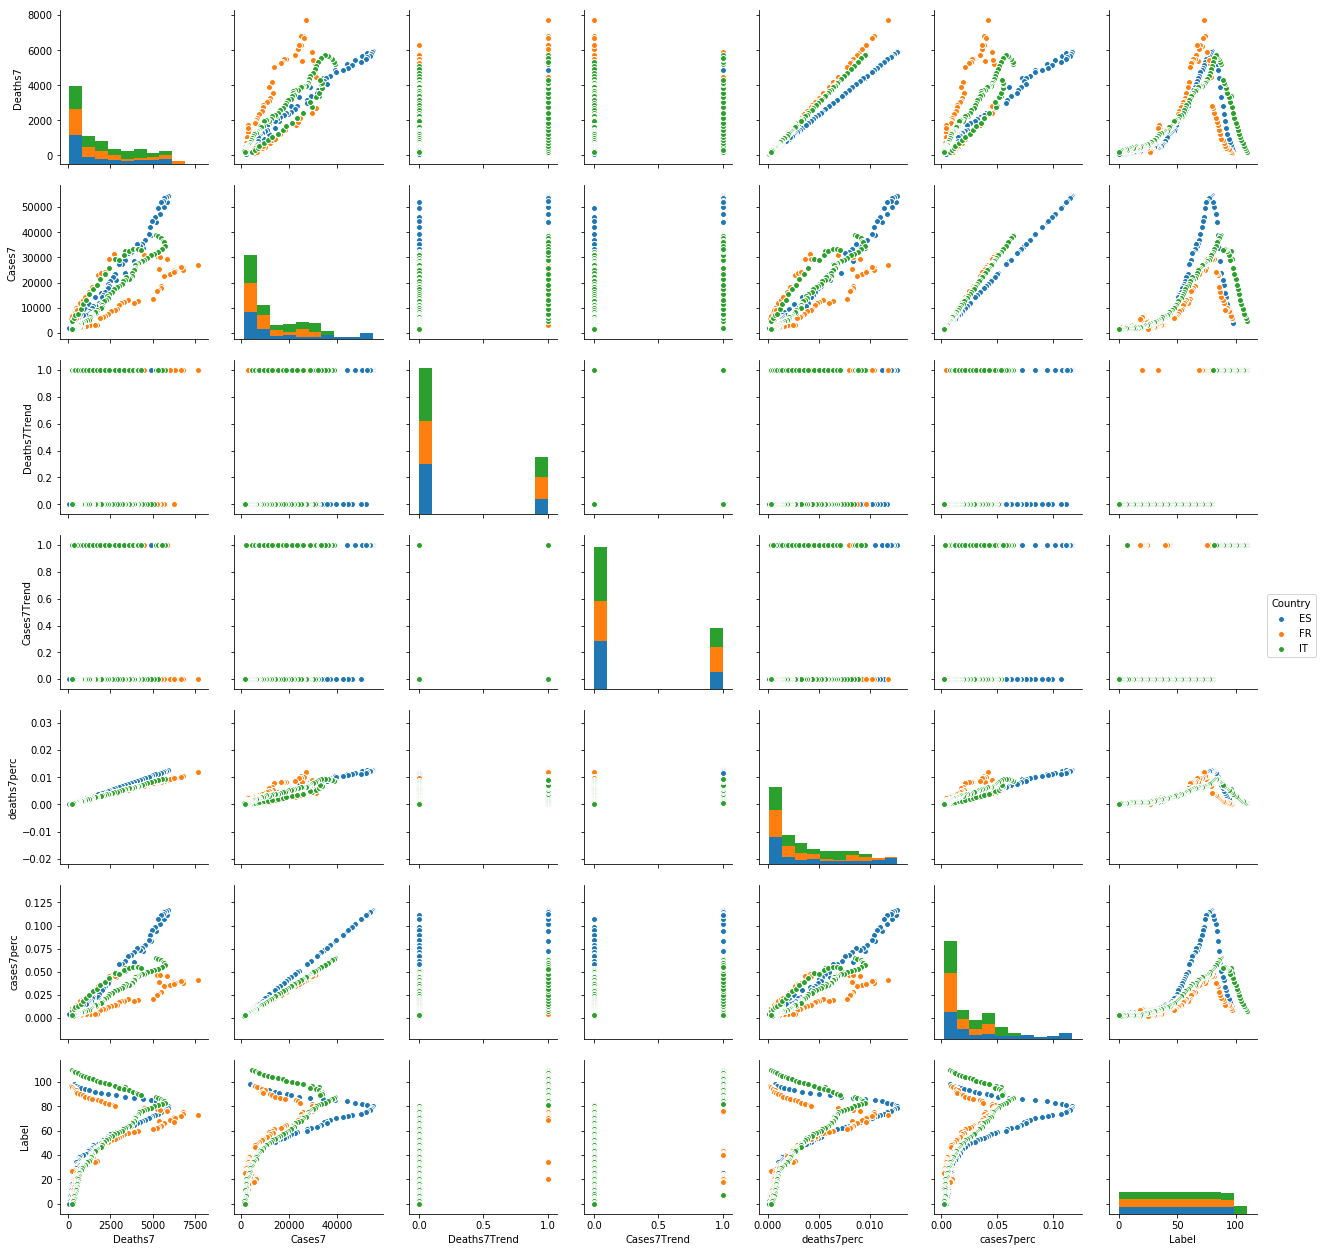

In [6]:
sns.pairplot(dataset, hue='Country', size=2.5)

In [7]:
X = dataset[['deaths7perc', 'cases7perc', 'Deaths7Trend', 'Cases7Trend']]
y = dataset['Label']

In [8]:
X["deaths7perc"]=X["deaths7perc"]*1000
X["cases7perc"]=X["cases7perc"]*1000

C:\Users\DELL\.conda\envs\hackatonV2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\DELL\.conda\envs\hackatonV2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
X

,deaths7perc,cases7perc,Deaths7Trend,Cases7Trend
0,0.701508,8.249132,1,1
1,0.947463,11.504299,1,1
2,1.289662,15.781785,1,1
3,1.631861,17.467115,1,1
4,2.057471,20.437829,1,1
5,2.596434,24.749535,1,1
6,3.323607,30.323099,1,1
7,4.157717,33.674510,1,1
8,5.026046,40.997566,1,1
9,6.059059,44.517937,1,1


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Regressao Linear

In [63]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [64]:
y_pred = regressor.predict(X_test)

In [65]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
288,19.0,39.810305
9,101.0,77.090858
57,53.0,39.740419
60,50.0,37.546240
25,85.0,100.145155
63,47.0,37.564228
92,18.0,28.953385
184,25.0,40.748339
244,63.0,54.830087
46,64.0,47.153994


In [66]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 14.512371220282619
Mean Squared Error: 277.12198712028083
Root Mean Squared Error: 16.646981321557398


SVR

In [90]:
from sklearn import svm

In [115]:
# Kernel - rbf ou sigmoid
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR
clf = svm.SVR(kernel="sigmoid", gamma="scale", coef0=0, )
clf.fit(X, y)

SVR(coef0=0, kernel='sigmoid')

In [116]:
y_pred = clf.predict(X_test)

In [117]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
288,19.0,33.577176
9,101.0,62.881282
57,53.0,59.156930
60,50.0,55.292630
25,85.0,59.848501
63,47.0,51.552498
92,18.0,19.338058
184,25.0,35.190688
244,63.0,61.486538
46,64.0,63.694853


In [118]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 12.465624111634874
Mean Squared Error: 309.24650620066694
Root Mean Squared Error: 17.58540605731545


NuSVR

In [120]:
from sklearn.svm import NuSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [121]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVR.html#sklearn.svm.NuSVR
regr = make_pipeline(StandardScaler(), NuSVR(C=1.0, nu=0.1))
regr.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()), ('nusvr', NuSVR(nu=0.1))])

In [122]:
y_pred = regr.predict(X_test)

In [123]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
288,19.0,46.861275
9,101.0,61.139983
57,53.0,44.557264
60,50.0,43.540415
25,85.0,53.907708
63,47.0,43.292061
92,18.0,40.938547
184,25.0,46.960063
244,63.0,48.759929
46,64.0,47.679684


In [124]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 19.660302702183884
Mean Squared Error: 568.9379380481139
Root Mean Squared Error: 23.852419962094285


AdaBoost

In [17]:
from sklearn.ensemble import AdaBoostRegressor

In [18]:
regr2 = AdaBoostRegressor(random_state=42, n_estimators=500, learning_rate=0.1, loss="linear")
regr2.fit(X, y)

AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='linear',
         n_estimators=500, random_state=42)

In [19]:
y_pred = regr2.predict(X_test)

In [20]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
288,19.0,22.761905
9,89.0,87.222222
57,41.0,43.666667
60,38.0,41.571429
25,73.0,70.437500
63,35.0,35.488372
92,6.0,12.000000
184,12.0,13.594203
244,63.0,63.960000
46,52.0,55.090909


In [26]:
r2 = metrics.r2_score(y_test, y_pred)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', r2)
print('R2 Adjusted:', (1 - (1 - r2) * ((X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] - 1))))

Mean Absolute Error: 3.8061872818671327
Mean Squared Error: 23.60200620527887
Root Mean Squared Error: 4.858189601618989
R2: 0.9706650767684184
R2 Adjusted: 0.9702336808385422


In [32]:
scores = cross_val_score(regr2, X, y, cv=5, scoring='r2')
print(scores)
print(scores.mean())

[ 0.67231319  0.90513894 -0.27094562  0.83978257  0.83643025]
0.5965438657141192


In [16]:
with open("..\\..\\Modelos\\regressaoV2.pkl","wb") as f:
    pickle.dump(regr2, f)